# Tourism Case Study

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

 

## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

 
## Key Questions

- Which variables should be used for clustering?
- How many different groups/clusters of countries can be found from the data?
- How do the different clusters vary?
- How to use PCA to retain the components which explain 90% variance?
- How to perform clustering using the components obtained from PCA?


### Data Description

The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.


**Data Dictionary**
--Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market

--Company: Name of the company

--GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

--GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

--Current Price: Current stock price in dollars

--Price Change: Percentage change in the stock price in 13 weeks

--Volatility: Standard deviation of the stock price over the past 13 weeks

--ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)

--Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities

--Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)

--Net Income: Revenues minus expenses, interest, and taxes (in dollars)

--Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
Estimated Shares Outstanding: Company's stock currently held by all its shareholders

--P/E Ratio: Ratio of the company's current stock price to the earnings per share

--P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)



## Let's start coding!

### Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

* The dataset has 340 rows and 15 columns 

In [4]:
# viewing a random sample of the dataset
data.sample(n=15, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

**Observations**

- Many columns, like ROE, Cash Ratio, Net Cash Flow, Net Income are int64
- Ticker, Security, GICS Sector and GICS Sub Industry are of Object type

In [7]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,CB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,Equity Residential,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

**Observations**

- There are 340 Tickers belonging to 340 core security types 
- There are 11 GICS Sector types with Industrials is the most frequent with 53 entries
- There are 104 GICS Sub Industry with 'Oil & Gas Exploration & Production' being the most frequent with 16 entries
- There are several variables which indicate the earning per share, Price Change and P/B ratios are numeric with negative values for minimum

In [8]:
# Let us clean columns names
cols_init = df.columns.tolist()
cols_new = [item.split("(")[0].rstrip() for item in cols_init]
cols_units = ["(" + item.split("(")[-1] if "(" in item else None for item in cols_init]
print("New column names:\n", cols_new)
print("\nDescription/Units:\n", cols_units)

New column names:
 ['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry', 'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

Description/Units:
 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


<IPython.core.display.Javascript object>

In [9]:
df.columns = cols_new
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [10]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Ticker Symbol' are 

 ['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APH' 'ARNC'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME'
 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS'
 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EMN' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN'
 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB' 'FBHS' 'FCX' 'FE'
 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP'
 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN'
 'HCP' 'HE

<IPython.core.display.Javascript object>

**Observations**

*** Add observations here...


In [11]:
df.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


<IPython.core.display.Javascript object>

**Now we can convert the columns which are actually numeric in nature from *object* to *int*/*float* type.**

**type_cols = [
**    "Surface area",
**    "Economy: Agriculture",
*
**]
**
**for item in type_cols:
**    df[item] = pd.to_numeric(df[item])
**
**df.info()

**We will use only a subset of the columns for clustering. The type of variables chosen and the reasons for choosing them have been mentioned below.**



In [15]:
cluster_cols = [
    "Ticker Symbol",
    "Security",
    "GICS Sector",
    "GICS Sub Industry",
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
    "P/E Ratio",
    "P/B Ratio",
]

<IPython.core.display.Javascript object>

In [16]:
df1 = df[cluster_cols].copy()
df1.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


<IPython.core.display.Javascript object>

In [17]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,CB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,Equity Residential,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

**Observations**

- Except for Ticker, Security, GICS and GICS Sub category all other columns are numeric in nature.
- The numerical variables have different ranges and have to be scaled before clustering.
- There are NO missing values in the data which have to be dealt with.

## Data Preprocessing

In [19]:
# checking for missing values

df1.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

- We do not need to  impute the missing values by the median of the attributes grouped by region.

## EDA

### Univariate Analysis

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

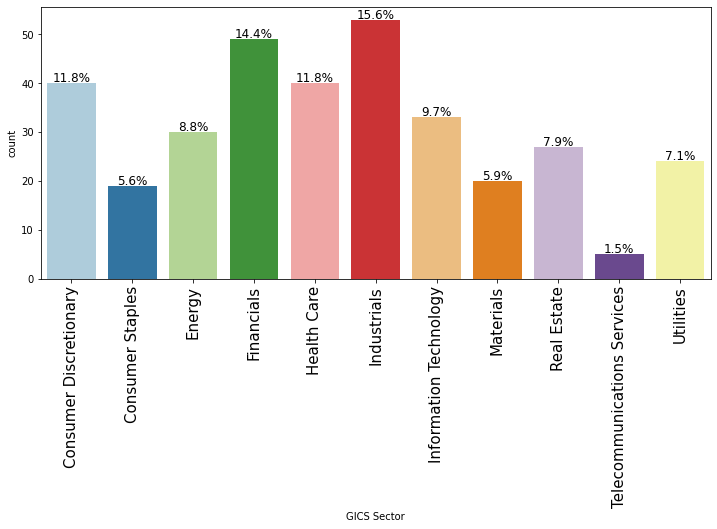

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df1, "GICS Sector", perc=True)

**Observations**

- Approx. 15.6% of the companies are in the Industrials segment
- Telecom services has the least number of companies in the data.

In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

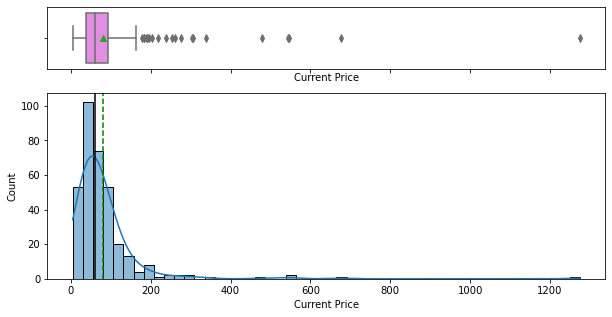

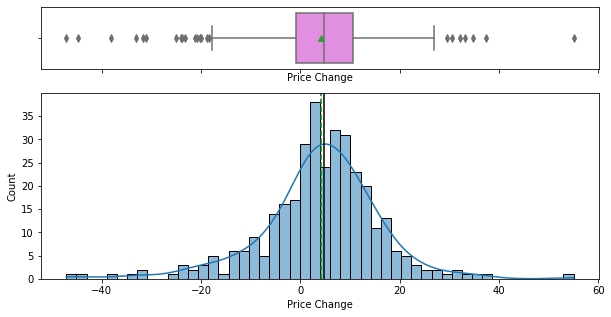

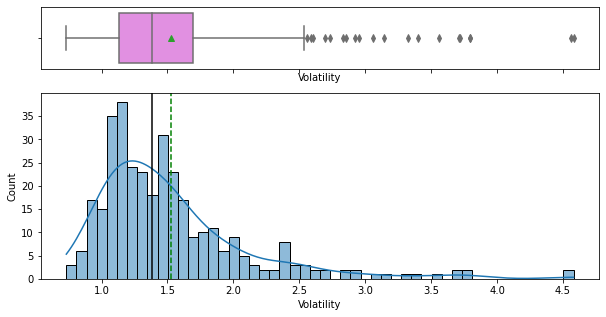

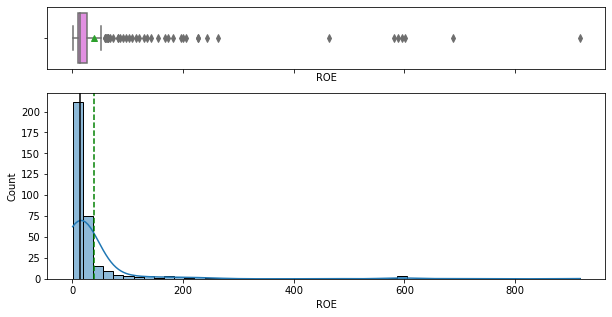

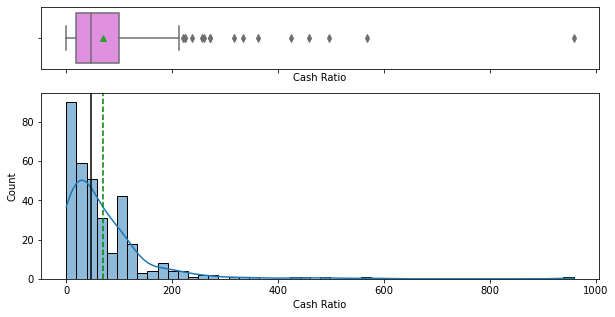

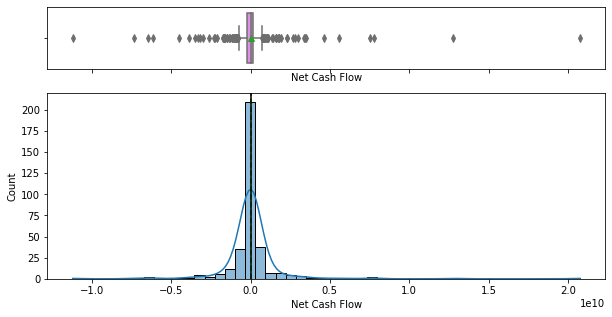

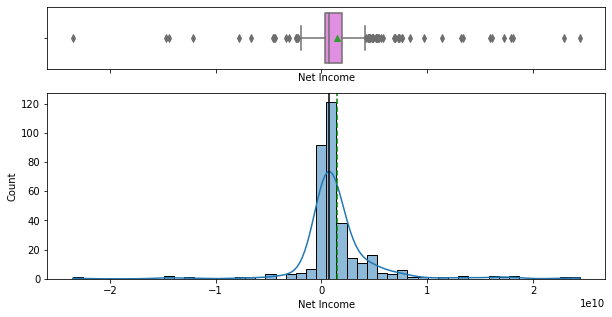

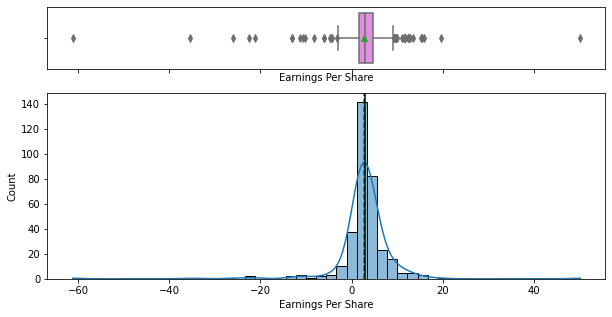

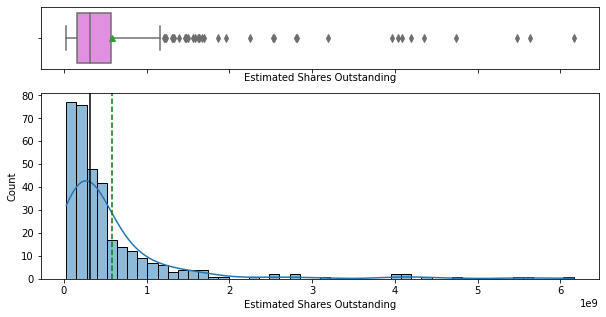

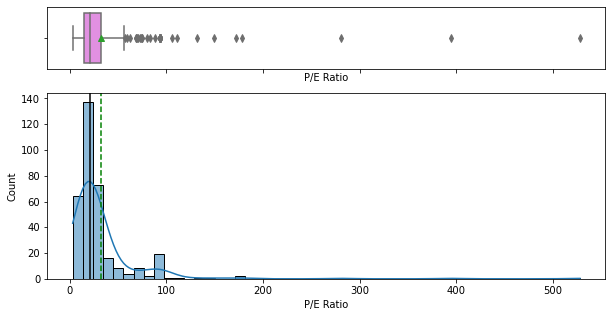

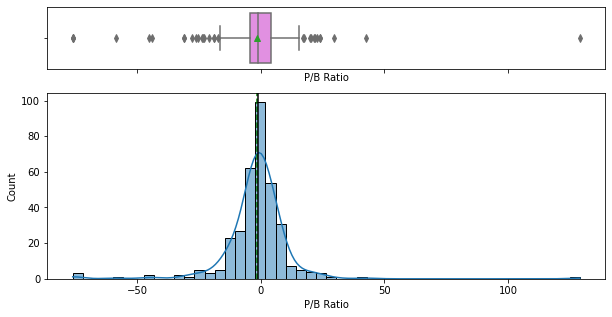

<IPython.core.display.Javascript object>

In [24]:
# selecting numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df1, item, bins=50, kde=True, figsize=(10, 5))

**Observations**

- Variables like Cash Ratios, ROE, << add here>>  are right-skewed and have extreme upper outliers.
- Earnings Per Shares, P/B Ratio are almost normally distributed.

### Bivariate Analysis

**Let's check for correlations.**

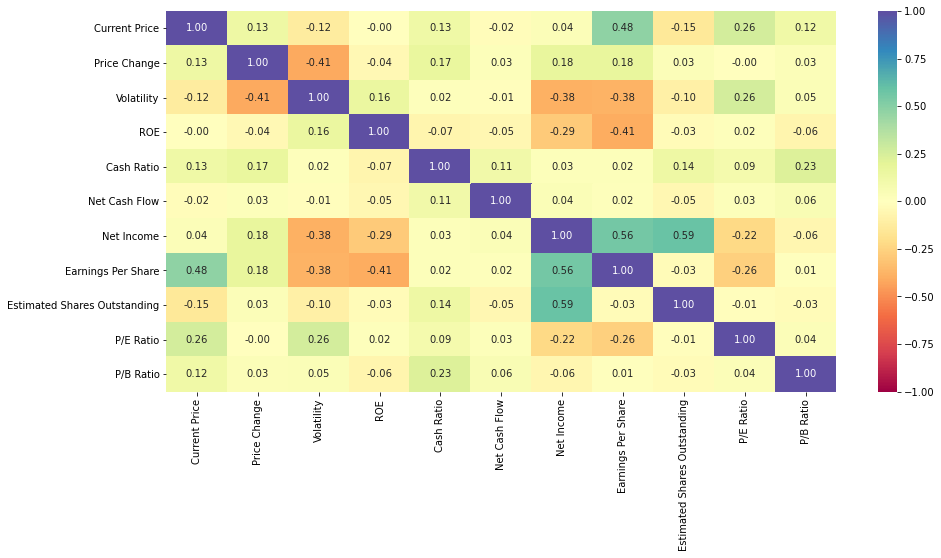

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

- *International trade: Import* is highly correlated with *International trade: Export* and the GDP of a country, which is obvious as countries with high GDP tend to execute more trades.
- *CO2 emission estimates* is highly correlated with the GDP of a country, indicating that countries with a high GDP tend to have higher amounts of CO2 emissions compared to countries with low GDP.

**Let's scale the data before we proceed to cluster it.**

In [1]:
"Ticker Symbol","Security","GICS Sector","GICS Sub Industry",

('Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry')

In [26]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(
        df1.drop(
            ["Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"], axis=1
        )
    ),
    columns=df1.drop(
        ["Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"], axis=1
    ).columns,
)
subset_scaled_df.head(10)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
5,-0.451251,-1.342556,-0.016049,-0.307006,-0.232849,-0.125823,0.090133,0.032432,0.048977,-0.459427,0.660752
6,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562
7,-0.384353,-0.158797,-0.679931,-0.317379,-0.620496,0.119096,-0.218177,-0.026856,-0.393572,-0.360984,0.071614
8,-0.230744,-0.142338,-0.774192,-0.296633,-0.675874,-0.021424,0.141806,0.053714,-0.183672,-0.319668,-0.093530
9,-0.214096,-0.087667,-0.808359,-0.265515,0.320933,-0.187053,0.263986,0.471769,-0.173153,-0.506408,-0.011879


<IPython.core.display.Javascript object>

## Hierarchical Clustering

In [27]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correlation

<IPython.core.display.Javascript object>

In [28]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [29]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [30]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

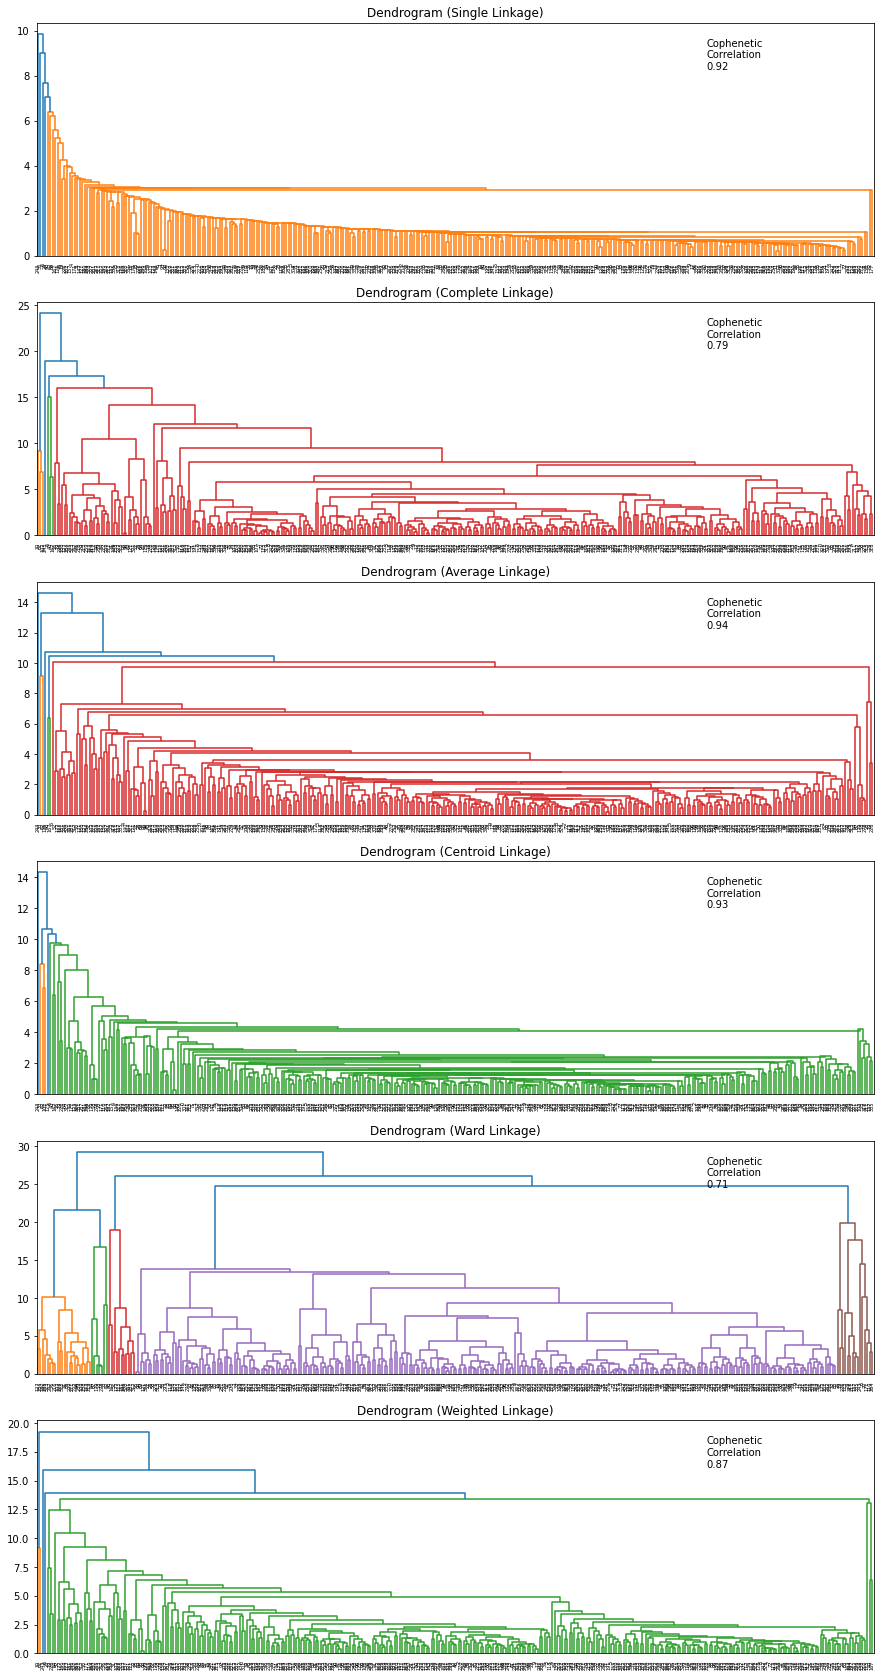

<IPython.core.display.Javascript object>

In [31]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 7 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [32]:
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

<IPython.core.display.Javascript object>

In [33]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [34]:
cluster_profile = df1.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [36]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [37]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 6, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scient

<IPython.core.display.Javascript object>

**We see that there are 4 clusters of one country, 1 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

In [39]:
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=7)

<IPython.core.display.Javascript object>

In [40]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [41]:
cluster_profile = df1.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [42]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [45]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print(
        "The",
        df1[df1["HC_Clusters"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df1[df1["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 280 companies in cluster 1 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'AMETEK Inc' 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Car

<IPython.core.display.Javascript object>

**Now the clusters seem to have more variability.**

In [46]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,563.992491,17.235667,1.839399,10.250000,125.500000,105834000.000000,853500250.000000,13.085000,287806305.492500,307.105187,-4.254889,4
1,73.062443,4.673490,1.399188,34.878571,54.507143,66523982.142857,1556658764.285714,3.689625,443300430.283964,24.379506,-3.214885,280
2,164.654920,15.257627,1.812092,25.571429,296.333333,317861428.571429,744014523.809524,3.850476,566226247.226190,41.057292,17.410120,21
3,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2


<IPython.core.display.Javascript object>

IndexError: list index out of range

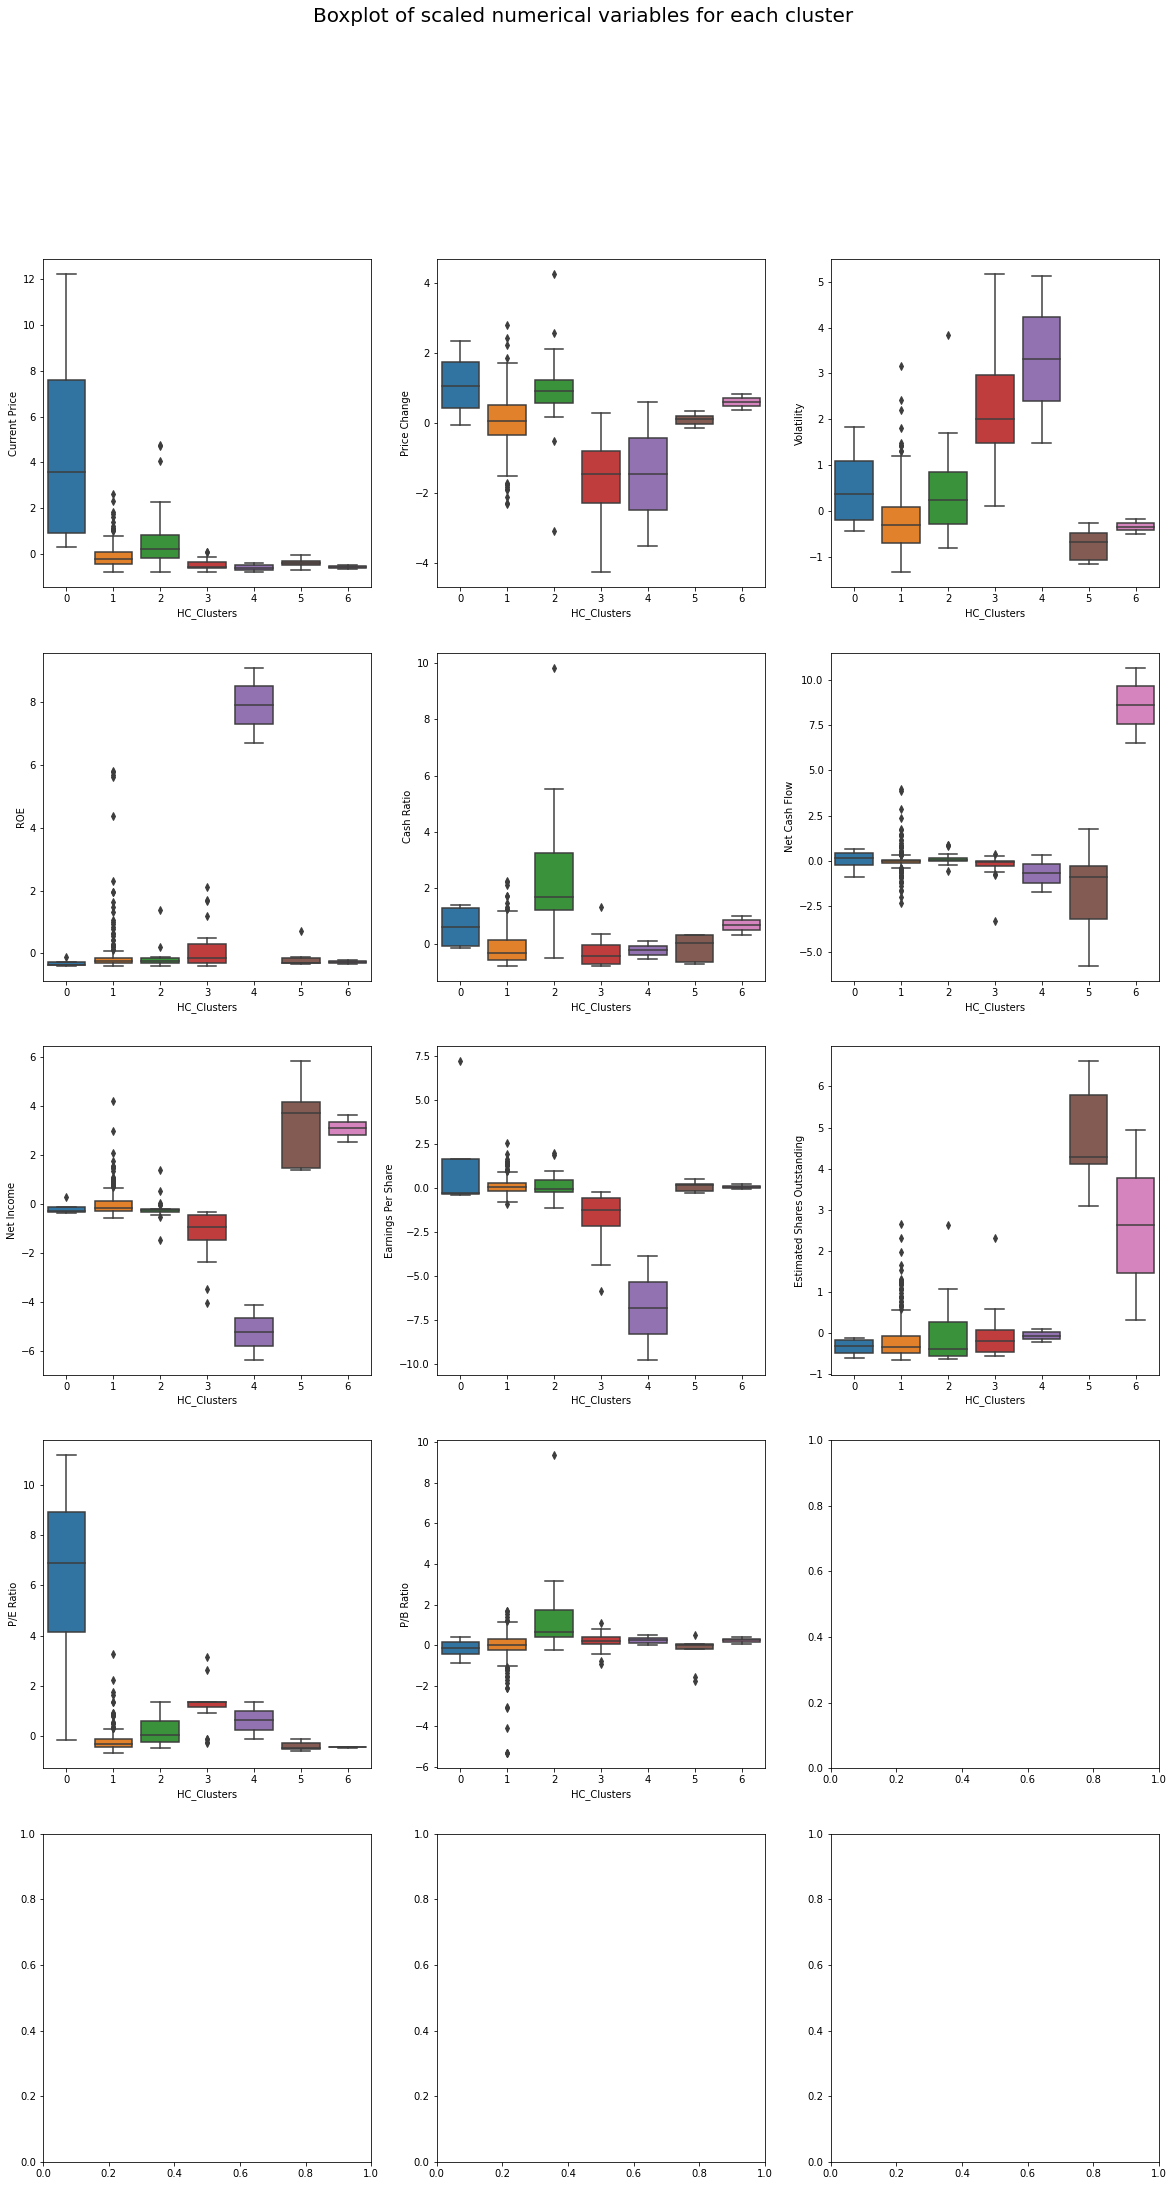

<IPython.core.display.Javascript object>

In [48]:
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

IndexError: list index out of range

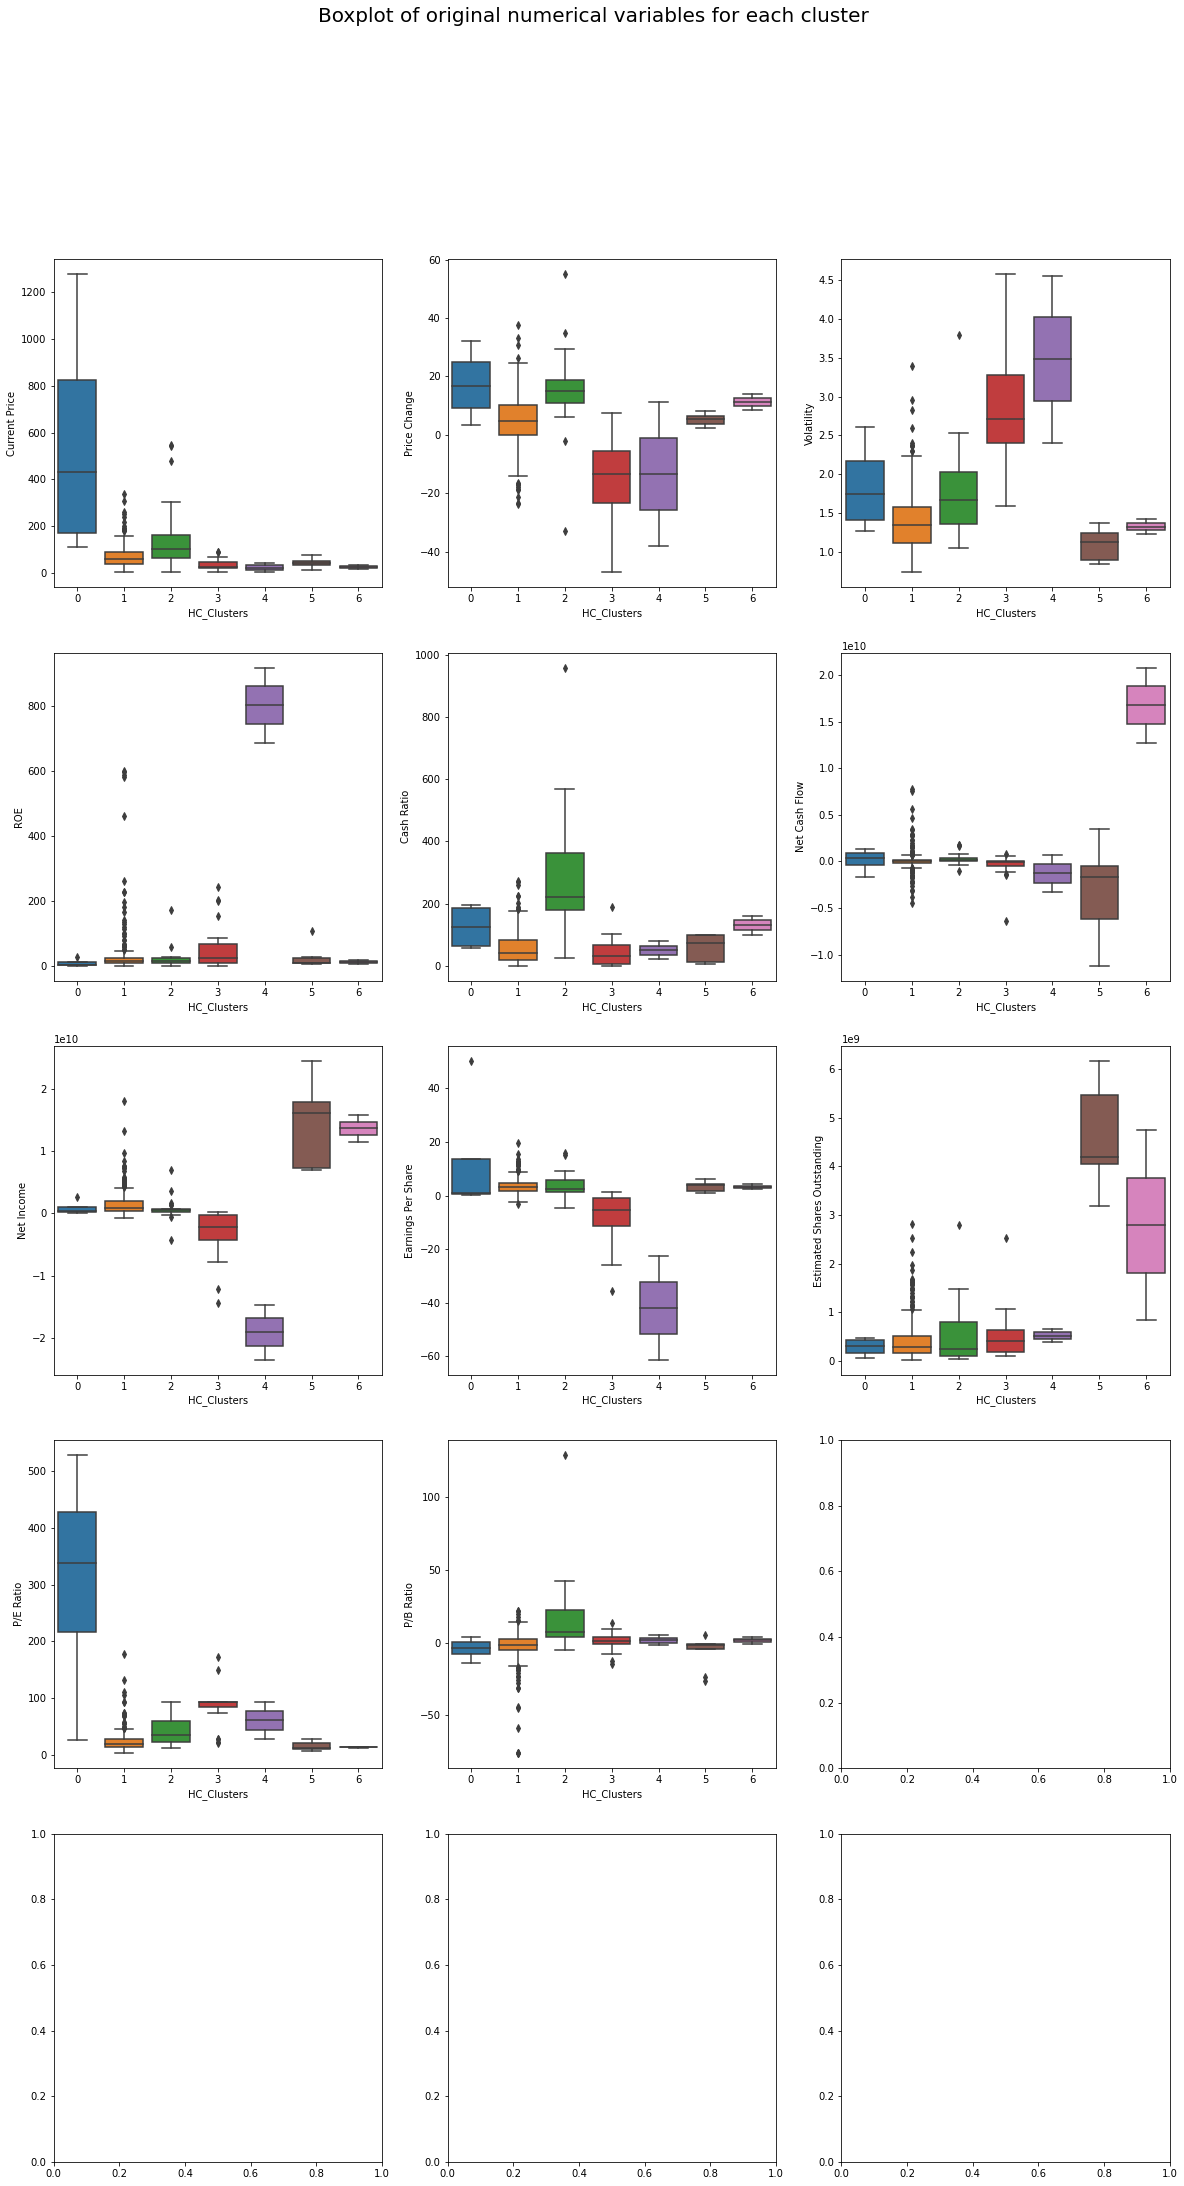

<IPython.core.display.Javascript object>

In [49]:
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii][0], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights

    <<Need to Change to Our final observations>>
    
    We will look into clusters 0, 2, and 5 only because the other clusters have only 1 or 2 countries in them.

- **Cluster 0**
   - There are 88 countries in this cluster.
   - The number of individuals using the internet is moderate and mobile subscribers are low to moderate.
   - Expenditure on health is low to moderate and that on education is also low to moderate.
   - GDP is low but the economy is healthy and balanced across agriculture, industry, services, and other activities.
   
   
- **Cluster 2**
   - There are 132 countries in this cluster.
   - The number of individuals using the internet is low but mobile subscribers are high.
   - Expenditure on health is moderate to high and that on education is also moderate to high.
   - GDP is moderate and economy is moderately healthy with a slightly high dependence on services and other activities.
   
   
- **Cluster 5**
   - There are 5 countries in this cluster.
   - The number of individuals using the internet are moderate to high and mobile subscribers are also moderate to high.
   - Expenditure on health is high and that on education is moderate.
   - GDP is high and economy is moderately healthy with a slightly high dependence on services and other activities.


## Recommendations

**Cluster 5 countries are good places to provide tourism services based on cluster profiling done above.**

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [50]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

<IPython.core.display.Javascript object>

In [51]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.37472898748270095

<IPython.core.display.Javascript object>

- The first two principal components explain 48.5% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

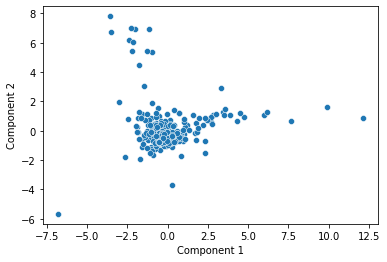

<IPython.core.display.Javascript object>

In [52]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

- We can kind of see two broad clusters if we draw a horizontal line around y=1.
- There a few outlier points too.

Let's colour the scatterplot by cluster labels.

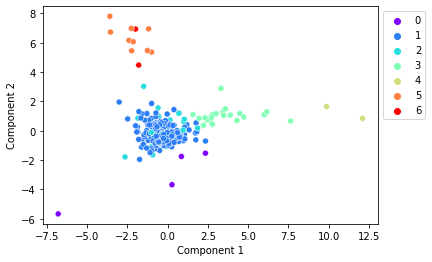

<IPython.core.display.Javascript object>

In [53]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Cluster 0 and 2 are the major clusters.
- The rest of the data points seem to be mostly outliers.